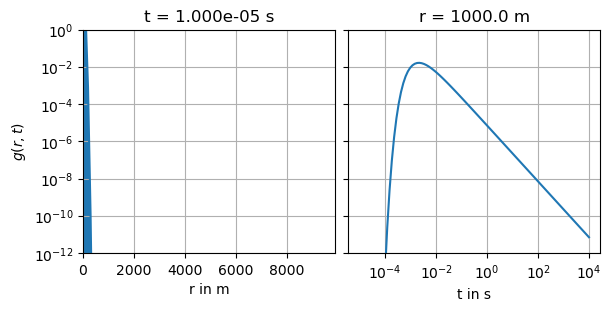

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def green(sigma, r, t):
    mu = np.pi * 4e-7
    g = np.sqrt(mu * sigma) / (2 * np.pi * t)**1.5 * \
        np.exp(-0.25 * mu * sigma * r**2 / t)
    return g

sigma = 0.01
n = 101

r = np.arange(start=0, stop=10000, step=100)
T = np.logspace(start=-5, stop=4, num=n, endpoint=True)

rfix = 1e3
g_t = [green(sigma, rfix, tt) for tt in T]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharey=True, layout='constrained')

def update(frame):
    ax1.set_yscale('linear')
    ax1.clear()
    ax2.clear()
    t = T[frame]
    g_r = [green(sigma, r, t) for r in r]
    ax1.semilogy(r, g_r)
    ax1.semilogy(rfix, green(sigma, rfix, t), color='red', marker='o')
    ax1.axhline(y=green(sigma, rfix, t), linewidth=1, color='red')
    ax2.loglog(T, g_t)
    ax2.loglog(t, green(sigma, rfix, t), color='red', marker='o')
    ax2.axhline(y=green(sigma, rfix, t), linewidth=1, color='red')
    intens = 0.8 * np.exp(-t / 10) + 0.2
    ax1.fill_between(r, g_r, np.zeros_like(r), alpha=intens)
    ax1.set_ylim(1e-12, 1)
    ax1.set_xlim(0.0, r[-1])
    ax1.set_title('t = ' + "{:.3e}".format(t) + ' s')
    ax2.set_title('r = ' + str(rfix) + ' m')
    ax1.grid(True)
    ax2.grid(True)
    ax1.set_xlabel('r in m')
    ax2.set_xlabel('t in s')
    ax1.set_ylabel(r'$g(r,t)$')

ani = FuncAnimation(fig, update, frames=n, interval=200)

ani.save('green_animation.gif')